# 台灣測速執法設置點 與 A1類交通事故 關係程度
## Outline
##### 1. 前言
##### 2. 分析方式
##### 3. Step.1
##### 4. Step.2
##### 5. Step.3
##### 6. 總結

### 1. 前言
每年車禍事件在新聞報章雜誌媒體上屢見，雖然政府機關對交通事故事件制定法規與實際政策執行上有所成效，但如果可以針對某些政府對應方法觀察成效，是否能透過加強該項措施減少交通事故的發生呢？

### 2. 分析方式
以台灣A1交通事故資料，根據地區統計台灣縣市的車禍發生率，簡單看出每個縣市的年度交通事故量；再以各台灣測速執法設置點資料，整理出每個縣市的值法點設置量，可以觀察台灣的測速值法點與縣市交通事故量是否有關係；最後根據台灣年度每月份交通事故發生量判斷是否可以做為未來改善方向，也就是以月分、地區加強執法點設置減少交通事故發生。

### 3. Step.1
#### 目的：統計各縣市的交通事故發生件數
資料內有多欄數據，但首先我要根據發生地點放大至我所需要的大小，資料初始是精確至戶籍幾號，但我只要到第一個單位(ex:高雄市)，所以把發生地點該欄的資料都切割取前三位的值。
死亡受傷人數我都只需要數字部份方便統計，所以分別取出死亡受傷人數該欄內的死亡與受傷人數為兩欄，移除不需要的接著把資料轉換成可以計算的Integer格式。

In [9]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab as pl

In [10]:
url = 'https://quality.data.gov.tw/dq_download_csv.php?nid=12197&md5_url=e5dd0854c606d980fb72e0cd9a23dd35'
data = pd.read_csv(url, encoding='utf-8-sig')

my_font = matplotlib.font_manager.FontProperties(fname="C:\Windows\\Fonts\\mingliU.ttc")
data = data.dropna()                                                # Remove the row with "Nah" information from the data
data['發生時間'] = data['發生時間'].map(lambda x:x.split(' ')[0])    # Simplify column "發生時間"

# Data1 processing
my_font = matplotlib.font_manager.FontProperties(fname="C:\Windows\\Fonts\\mingliU.ttc")
data['發生地點'] = data['發生地點'].map(lambda x:x[0:3])
data['死亡人數'] = data['死亡受傷人數'].map(lambda x:x[2:3])
data['受傷人數'] = data['死亡受傷人數'].map(lambda x:x.split('傷')[1])
data = data.drop(columns = ['發生時間', '死亡受傷人數', '車種'])                  # Delete the useless columns "發生時間","死亡受傷人數", "車種"
data['死亡人數'] = data['死亡人數'].astype('int')
data['受傷人數'] = data['受傷人數'].astype('int')
data = data.groupby('發生地點', as_index=False).sum()
print(data)

   發生地點  死亡人數  受傷人數
0   南投縣    61    54
1   嘉義市     8     3
2   嘉義縣    67    29
3   基隆市    19     9
4   宜蘭縣    37    19
5   屏東縣   101    55
6   彰化縣    79    27
7   新北市    72    48
8   新竹市    29    17
9   新竹縣    57    25
10  桃園市   126    70
11  澎湖縣    10     5
12  臺中市    64    24
13  臺北市    47    38
14  臺南市   177    78
15  臺東縣    39    21
16  花蓮縣    48    25
17  苗栗縣    42    20
18  金門縣    10     4
19  雲林縣    95    39
20  高雄市   147    62


依據上述表格，做出Stacked bar堆疊圖，圖視化資訊，研究台灣各縣市的傷亡統計，遇到的問題是在轉換中文字，如果沒有將系統轉換默認中文，那麼圖表下方會出現空格，無法讀取，在這個問題上，我運用https://www.zhihu.com/question/25404709內的步驟，並將文字"SimHei"載入C槽。
以目前來看，可以大概看出台南市、高雄市、桃園市是台灣傷亡人數前三大的城市；扣除離島資料，嘉義市、基隆市、新竹市則是傷亡人數後三名者，預測或許根據這項訊息，與執法測速點設置數量有關係。

中文字體導入檔案步驟：https://www.zhihu.com/question/25404709
SimHei檔案下載：http://www.fontpalace.com/font-details/SimHei/

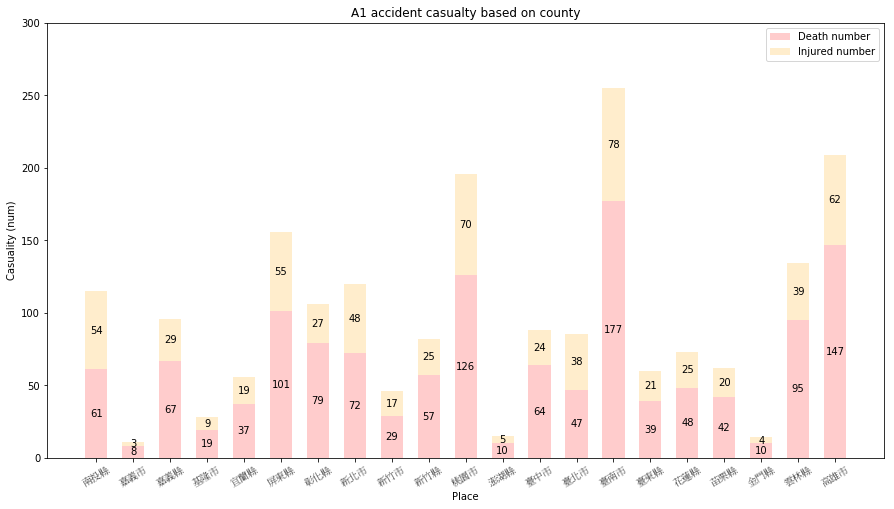

In [11]:
%matplotlib inline

# Data1 graphing
my_font = matplotlib.font_manager.FontProperties(fname="C:\Windows\\Fonts\\mingliU.ttc")
plt.figure(figsize=(15, 8))
x = data['發生地點']
y1 = data['死亡人數']
y2 = data['受傷人數']
p1 = plt.bar(x, y1, color='red', alpha=0.2, width=0.6, label='死亡人數')
p2 = plt.bar(x, y2, bottom = y1, color='orange', alpha=0.2, width=0.6, label='受傷人數')

for x, y1, y2 in zip(x, y1, y2):
    plt.text(x, y1/2, '%.0f' % y1, ha='center', va='center')
    plt.text(x, y1+y2/2, '%.0f' % y2, ha='center', va='center')

pl.xticks(rotation=30, fontProperties=my_font)
plt.yticks(np.arange(0, 301, 50))
plt.xlabel('Place')
plt.ylabel('Casuality (num)')
plt.legend((p1[0], p2[0]), ('Death number', 'Injured number'))
plt.title('A1 accident casualty based on county')
plt.show()

### 4. Step.2
#### 目的：統計每個縣市內的測速執法點設置量
導入的資訊內有不同欄，但是我只需要根據各個縣市統計設置數量，接著修改另一欄的title為Setting Amount，在這兩欄內因為有國道和縣道資訊，可是並不在本次研究的討論範圍內，所以藉由這兩類列的RigionName為0可以把國道和縣道資料移除，剩下的數量以縣市累計計算就是需要的統計資料了。

In [12]:
url = 'https://quality.data.gov.tw/dq_download_csv.php?nid=7320&md5_url=a6083bbf69505e2dc6bddaaad233fa6b'
data = pd.read_csv(url, encoding='utf-8-sig')

my_font = matplotlib.font_manager.FontProperties(fname="C:\Windows\\Fonts\\mingliU.ttc")
data = data.drop(columns = ['Address', 'DeptNm', 'BranchNm', 'Longitude', 'Latitude', 'direct', 'limit'])
data = data.drop([0])
data = data.groupby('CityName', as_index=False).count()
data = data.rename(columns={'RegionName': 'Setting Amount'})
data = data.drop([1, 4, 5, 6, 7 ,8, 9, 10, 11, 12])
print(data)

   CityName  Setting Amount
0       南投縣              16
2       嘉義市              19
3       嘉義縣               6
13      基隆市              65
14      宜蘭縣              60
15      屏東縣              67
16      彰化縣              58
17      新北市             237
18      新竹市              56
19      新竹縣              29
20      桃園市              43
21      澎湖縣              29
22      臺中市             164
23      臺北市              81
24      臺南市             109
25      臺東縣              42
26      花蓮縣              31
27      苗栗縣              72
28      連江縣               3
29      金門縣              16
30      雲林縣              51
31      高雄市             228


以"縣市內執法設置點統計數量"資料繪製折線圖，遇到中文的問題參考上述解決方法，以此產出的折線圖可以看出大致分布狀況，設置點最多的前三者分別為新北市、高雄市、台中市，後三者為嘉義縣、南投市、嘉義市(同樣扣除離島後)

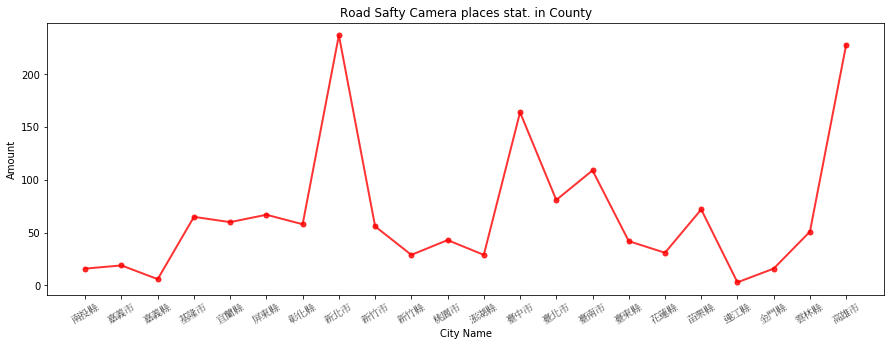

In [13]:
%matplotlib inline

my_font = matplotlib.font_manager.FontProperties(fname="C:\Windows\\Fonts\\mingliU.ttc")

plt.figure(figsize=(15, 5))

x = data['CityName']
y = data['Setting Amount']
plt.plot(x, y, color='red', alpha=0.8, linewidth=2.0, marker='o', ms=5)
# .annotate 是畫那條箭頭線用的， 
# connectionstyle: 曲線角度 參考：https://matplotlib.org/2.0.2/api/patches_api.html#matplotlib.patches.ConnectionStyle
# xytext 指的是要將文字放在座標軸的哪裡。
# plt.annotate(
#     s='something happened', xy=(324, 627), xytext=(400, 900), fontsize=15,
#     arrowprops={'arrowstyle':'->', 'connectionstyle': "angle3,angleA=0,angleB=90"}
# )
pl.xticks(rotation=30, fontProperties=my_font)
plt.xlabel('City Name')
plt.ylabel('Amount')
plt.title('Road Safty Camera places stat. in County')
plt.show()

傷亡人數前五：台南市、高雄市、桃園市、屏東縣、雲林縣
傷亡人數後五：嘉義市、基隆市、新竹市、宜蘭縣、台東縣
執法測速點數量多寡前五：新北市、高雄市、台中市、台南市、苗栗縣
執法測速點數量多寡後五：嘉義縣、南投縣、嘉義市、新竹市、花蓮市

#### 小結：簡列傷亡人數與測速執法點
以目前的小結而言，相對於平均值得前五筆與後五筆極端值而言，並沒有太大關係，唯一可得為傷亡人數多的台南市、高雄市，反而執法測試點設置量多；而嘉義市、新竹市設置點少反而縣市內的交通事故量少，相對於平均值，兩者間的關聯性並不是很高。
對高雄和台南市，未來如果需要有效減少交通事故發生量，測速執法設置點的新增或減少似乎不是重點；因交通事故發生的因素眾多，目前大概得出無法藉由測速值法點增加而得到顯著效果，若未來政府想解決交通事故問題，城市內的測速相機設置並非一項成功率很高的方式。

### 5. Step.3
#### 目的：以月份發生事件量作為未來加強交通事故預防的依據
和第一張圖表的資料相同，但要以時間作為累計參數。首先，資料內的時間精細度到秒，但是只需要到月份，所以為了放大資訊的範圍，我把時間該欄以字串做切割，然後返回切割首項，所以是年分還有月，得所求。
將月份累計後即可統計出各月發生事件量。

In [14]:
url = 'https://quality.data.gov.tw/dq_download_csv.php?nid=12197&md5_url=e5dd0854c606d980fb72e0cd9a23dd35'
data = pd.read_csv(url, encoding='utf-8-sig')

data = data.dropna()                                                # Remove the row with "Nah" information from the data
data['發生時間'] = data['發生時間'].map(lambda x:x.split(' ')[0])    # Simplify column "發生時間"

# Data1 processing
data['發生時間'] = data['發生時間'].map(lambda x:x.split('月')[0])    # Remove date(從"月") from column "發生時間"
data = data.groupby(by = '發生時間').count()                         # Stat. the incidents based on month
data = data.drop(columns = ['死亡受傷人數', '車種'])                  # Delete the useless columns "死亡受傷人數" & "車種"
data = data.rename(columns={'發生時間': 'Month'})                    # Rename the name of column
data = data.rename(columns={'發生地點': 'Incident'})                 # Rename the name of column
data.insert(0, 'Month', range(1, 13))
print(data)

        Month  Incident
發生時間                   
106年01      1       112
106年02      2       112
106年03      3       106
106年04      4       129
106年05      5       107
106年06      6       113
106年07      7       125
106年08      8       131
106年09      9        74
106年10     10        94
106年11     11        83
106年12     12        99


利用上述資料，做出1~12月的事故交通事件直方圖。直方圖顯示4月和8月交通事件發生數最多，甚至可說4月到8月的發生量遞增。

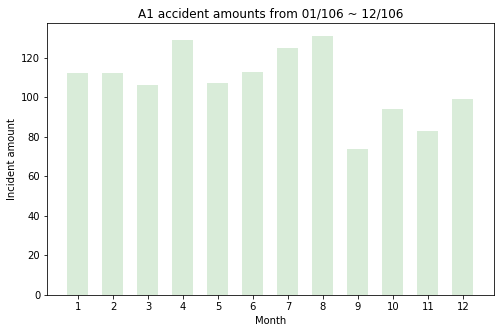

In [15]:
%matplotlib inline

# Data1 graph
plt.figure(figsize=(8, 5))
x = data['Month']
y = data['Incident']
plt.bar(x, y, color='green', alpha=0.15, width=0.6, tick_label=data['Month'])
plt.xlabel('Month')
plt.ylabel('Incident amount')
plt.title('A1 accident amounts from 01/106 ~ 12/106')
plt.show()

### 4. 總結
未來若要針對交通事故重點月份預防資料，這個區段可以做為重點方向，可能在這個時間區段內事故因素發生比例上升快速，比如進入暑假月份，觀光旅遊次數頻繁，也或許可以針對酒駕取締資料調查是否有關係。